<a href="https://colab.research.google.com/github/AyushSNair/AyushSNair/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Partitioning** **Methods**

**1. K-Means Clustering (Partitioning)**

***Concept:***

Divides data into K clusters by minimizing the Euclidean distance between data points and their assigned cluster centroids.


***Algorithm:***

Randomly initialize centroids → assign points → update centroids → repeat until convergence.


***Pros***:

Fast, simple, widely used.


***Cons***:  

Sensitive to outliers, assumes spherical clusters, requires predefined K.


***Best for***:

Structured, well-separated data (e.g., blob dataset).


In [ ]:
from google.colab import files
import pandas as pd

# Upload CSV file
uploaded = files.upload()

# Read it into a DataFrame
df = pd.read_csv(next(iter(uploaded)))
df.head()


Saving IRIS.csv to IRIS.csv


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target  # actual labels for later comparison

X.head()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


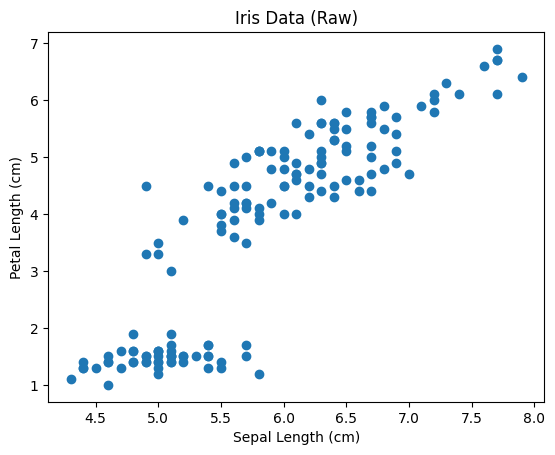

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X['sepal length (cm)'], X['petal length (cm)'])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Iris Data (Raw)')
plt.show()


In [ ]:
from sklearn.cluster import KMeans

# Apply KMeans with 3 clusters (since there are 3 species)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Predicted cluster labels
predicted_labels = kmeans.labels_


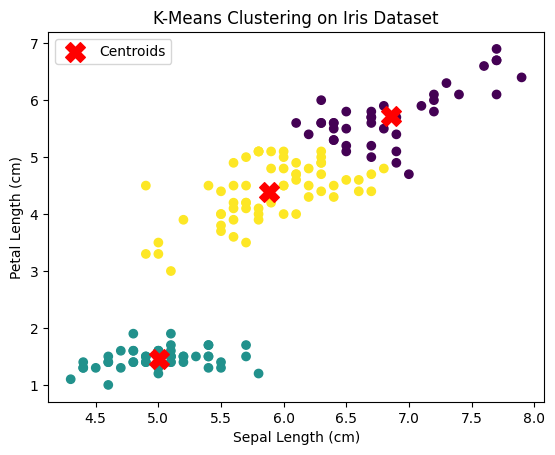

In [ ]:
plt.scatter(X['sepal length (cm)'], X['petal length (cm)'], c=predicted_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], s=200, c='red', marker='X', label='Centroids')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('K-Means Clustering on Iris Dataset')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import adjusted_rand_score

# This gives a score between -1 (bad) and 1 (perfect match)
score = adjusted_rand_score(y, predicted_labels)
print(f"Clustering Accuracy (Adjusted Rand Index): {score:.2f}")


Clustering Accuracy (Adjusted Rand Index): 0.72


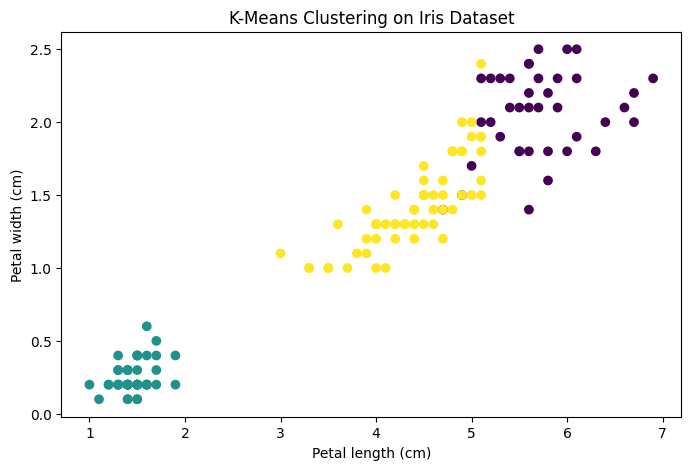

🔍 Confusion Matrix (Actual vs Predicted Labels):
[[ 0 50  0]
 [ 3  0 47]
 [36  0 14]]

✅ Adjusted Rand Index (ARI): 0.72


In [ ]:
# Step 1: Import libraries
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, adjusted_rand_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y_true = iris.target  # actual species labels

# Step 3: Apply KMeans (unsupervised – don't use y_true here)
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred = kmeans.fit_predict(X)

# Step 4: Visualize the clusters
plt.figure(figsize=(8, 5))
plt.scatter(X.iloc[:, 2], X.iloc[:, 3], c=y_pred, cmap='viridis')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('K-Means Clustering on Iris Dataset')
plt.show()

# Step 5: Compare with actual species using a confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)
print("🔍 Confusion Matrix (Actual vs Predicted Labels):")
print(conf_mat)

# Step 6: Check clustering accuracy using Adjusted Rand Index
ari_score = adjusted_rand_score(y_true, y_pred)
print(f"\n✅ Adjusted Rand Index (ARI): {ari_score:.2f}")


K-Medoids Clustering (Partitioning)

Concept: Similar to K-Means, but uses medoids (most centrally located real data point) instead of centroids.


Algorithm: Partitioning Around Medoids (PAM).


Pros: More robust to noise and outliers than K-Means.


Cons: Slower on large datasets.


Best for: Categorical or mixed-type data.




In [ ]:
# Upgrade numpy first to latest stable version
!pip install --upgrade numpy

# Install scikit-learn-extra after numpy upgrade
!pip install scikit-learn-extra


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 13.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.


In [ ]:
# Step 1: Install scikit-learn-extra (run once, then restart runtime)
!pip install scikit-learn-extra


In [ ]:
# Step 1: Install scikit-learn-extra (run this only once in your environment)
!pip install scikit-learn-extra

# Step 2: Import libraries
from sklearn.datasets import load_iris
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import confusion_matrix, adjusted_rand_score
import pandas as pd
import matplotlib.pyplot as plt

# Step 3: Load Iris dataset
iris = load_iris()
X = iris.data
y_true = iris.target

# Step 4: Apply K-Medoids clustering
kmedoids = KMedoids(n_clusters=3, random_state=42)
y_pred = kmedoids.fit_predict(X)

# Step 5: Visualize clusters
plt.scatter(X[:, 2], X[:, 3], c=y_pred, cmap='viridis')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('K-Medoids Clustering on Iris Dataset')
plt.show()

# Step 6: Compare predicted clusters with actual labels
conf_mat = confusion_matrix(y_true, y_pred)
print("Confusion Matrix (Actual vs Predicted):")
print(conf_mat)

# Step 7: Calculate Adjusted Rand Index
ari_score = adjusted_rand_score(y_true, y_pred)
print(f"Adjusted Rand Index (ARI): {ari_score:.2f}")


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
from sklearn.datasets import load_iris
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import confusion_matrix, adjusted_rand_score
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y_true = iris.target

kmedoids = KMedoids(n_clusters=3, random_state=42)
y_pred = kmedoids.fit_predict(X)

plt.scatter(X[:, 2], X[:, 3], c=y_pred, cmap='viridis')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('K-Medoids Clustering on Iris Dataset')
plt.show()

print("Confusion Matrix (Actual vs Predicted):")
print(confusion_matrix(y_true, y_pred))

print(f"Adjusted Rand Index (ARI): {adjusted_rand_score(y_true, y_pred):.2f}")


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
from sklearn.datasets import load_iris
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import confusion_matrix, adjusted_rand_score
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y_true = iris.target

kmedoids = KMedoids(n_clusters=3, random_state=42)
y_pred = kmedoids.fit_predict(X)

plt.scatter(X[:, 2], X[:, 3], c=y_pred, cmap='viridis')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('K-Medoids Clustering on Iris Dataset')
plt.show()

print("Confusion Matrix (Actual vs Predicted):")
print(confusion_matrix(y_true, y_pred))

print(f"Adjusted Rand Index (ARI): {adjusted_rand_score(y_true, y_pred):.2f}")


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
# Step 1: Install pyclustering
!pip install pyclustering

# Step 2: Import necessary modules
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import calculate_distance_matrix
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, adjusted_rand_score
import matplotlib.pyplot as plt
import numpy as np


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395100 sha256=c47e93e011d410ad7320bdcf1e898fd5f6681076b809534f4ddb95e65c6d8e30
  Stored in directory: /root/.cache/pip/wheels/9f/99/15/e881f46a92690ae77c2e3b255b89ea45d3a867b1b6c2ab3ba9
Successfully built pyclustering


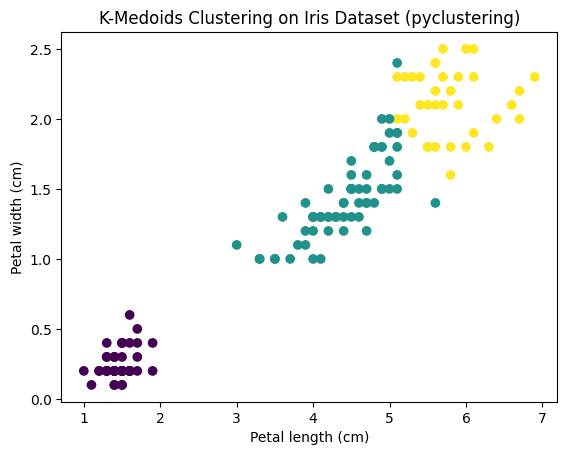

Confusion Matrix:
[[50  0  0]
 [ 0 50  0]
 [ 0 15 35]]
Adjusted Rand Index (ARI): 0.75


In [ ]:
# Step 1: Install pyclustering
!pip install pyclustering

# Step 2: Import necessary modules
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import calculate_distance_matrix
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, adjusted_rand_score
import matplotlib.pyplot as plt
import numpy as np

# Step 3: Load iris dataset
iris = load_iris()
data = iris.data
true_labels = iris.target

# Step 4: Select initial medoids (random unique indices)
initial_medoids = [0, 50, 100]  # you can pick 3 initial medoids indices manually

# Step 5: Run K-Medoids
kmedoids_instance = kmedoids(data, initial_medoids)
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()

# Step 6: Create predicted labels array
predicted_labels = np.empty(len(data))
for cluster_id, cluster in enumerate(clusters):
    for index in cluster:
        predicted_labels[index] = cluster_id

# Step 7: Visualize results (petal length vs petal width)
plt.scatter(data[:, 2], data[:, 3], c=predicted_labels, cmap='viridis')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('K-Medoids Clustering on Iris Dataset (pyclustering)')
plt.show()

# Step 8: Evaluate with confusion matrix and ARI score
print("Confusion Matrix:")
print(confusion_matrix(true_labels, predicted_labels.astype(int)))

ari = adjusted_rand_score(true_labels, predicted_labels.astype(int))
print(f"Adjusted Rand Index (ARI): {ari:.2f}")


3. Agglomerative Clustering (Hierarchical - Bottom-Up)


Concept: Each data point starts as its own cluster; pairs of clusters are merged based on linkage (distance) criteria.


Output: Dendrogram showing hierarchy of merges.


Pros: No need to predefine number of clusters.


Cons: Computationally expensive, sensitive to linkage method.


Best for: Small to medium datasets.




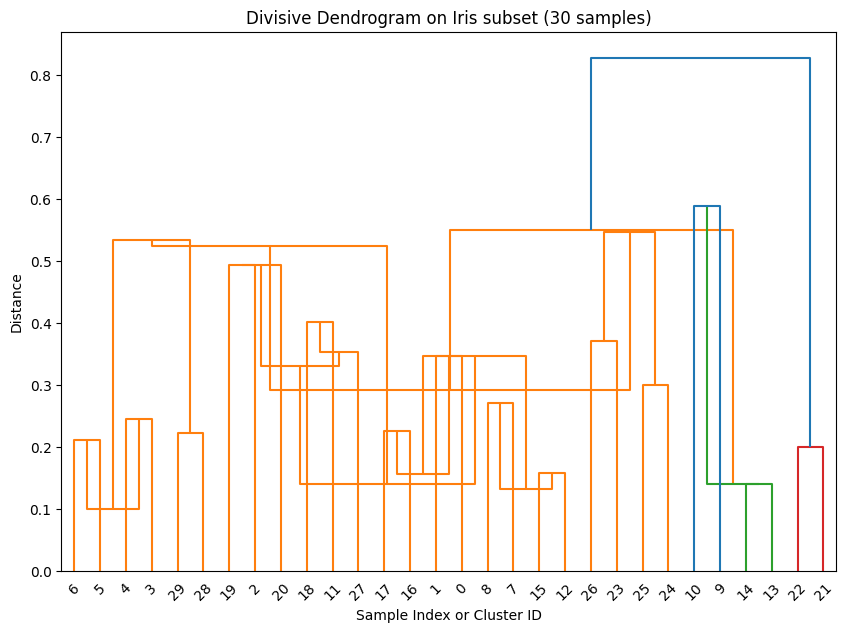

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()
X = iris.data[:30]  # smaller subset of 30 samples

def divisive_linkage(X, indices=None, linkage_matrix=None, node_id=0):
    if indices is None:
        indices = np.arange(len(X))
    if linkage_matrix is None:
        linkage_matrix = []

    if len(indices) <= 1:
        return node_id, linkage_matrix

    kmeans = KMeans(n_clusters=2, random_state=42).fit(X[indices])
    labels = kmeans.labels_

    left_indices = indices[labels == 0]
    right_indices = indices[labels == 1]

    left_node_id, linkage_matrix = divisive_linkage(X, left_indices, linkage_matrix, node_id)
    right_node_id, linkage_matrix = divisive_linkage(X, right_indices, linkage_matrix, left_node_id + 1)

    dist = np.linalg.norm(kmeans.cluster_centers_[0] - kmeans.cluster_centers_[1])
    count = len(indices)

    linkage_matrix.append([left_node_id, right_node_id, dist, count])

    return right_node_id + 1, linkage_matrix

_, linkage_matrix = divisive_linkage(X)
linkage_matrix = np.array(linkage_matrix)

plt.figure(figsize=(10, 7))
plt.title("Divisive Dendrogram on Iris subset (30 samples)")
dendrogram(linkage_matrix, count_sort='descending')
plt.xlabel("Sample Index or Cluster ID")
plt.ylabel("Distance")
plt.show()


Divisive Clustering (Hierarchical - Top-Down)

Concept: Start with one big cluster, recursively split it into smaller clusters.


Less common than agglomerative but theoretically useful.


Pros: Can be more accurate if splits are done wisely.


Cons: Requires good splitting strategy.




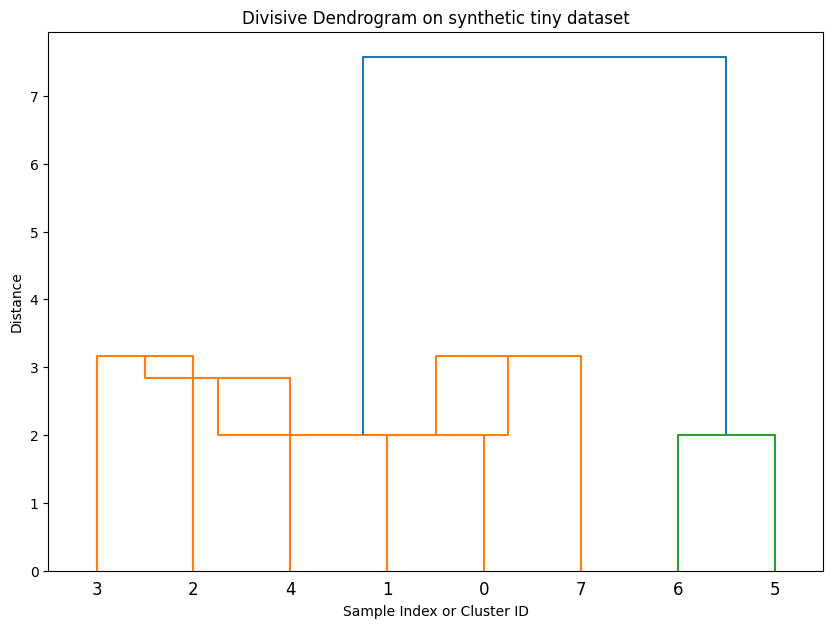

In [ ]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
import numpy as np

X = np.array([
    [1, 2],
    [1, 4],
    [1, 0],
    [4, 2],
    [4, 4],
    [4, 0],
    [10, 2],
    [10, 4]
])

def divisive_linkage(X, indices=None, linkage_matrix=None, node_id=0):
    if indices is None:
        indices = np.arange(len(X))
    if linkage_matrix is None:
        linkage_matrix = []

    if len(indices) <= 1:
        return node_id, linkage_matrix

    kmeans = KMeans(n_clusters=2, random_state=42).fit(X[indices])
    labels = kmeans.labels_

    left_indices = indices[labels == 0]
    right_indices = indices[labels == 1]

    left_node_id, linkage_matrix = divisive_linkage(X, left_indices, linkage_matrix, node_id)
    right_node_id, linkage_matrix = divisive_linkage(X, right_indices, linkage_matrix, left_node_id + 1)

    dist = np.linalg.norm(kmeans.cluster_centers_[0] - kmeans.cluster_centers_[1])
    count = len(indices)

    linkage_matrix.append([left_node_id, right_node_id, dist, count])

    return right_node_id + 1, linkage_matrix

_, linkage_matrix = divisive_linkage(X)
linkage_matrix = np.array(linkage_matrix)

plt.figure(figsize=(10, 7))
plt.title("Divisive Dendrogram on synthetic tiny dataset")
dendrogram(linkage_matrix, count_sort='descending')
plt.xlabel("Sample Index or Cluster ID")
plt.ylabel("Distance")
plt.show()


**DBSCAN (Density-Based Spatial Clustering)**

Concept: Finds clusters based on dense regions; separates sparse regions as noise.


Parameters: eps (radius), min_samples (minimum points in a dense region).


Pros: Finds arbitrarily shaped clusters; handles noise well.


Cons: Struggles with varying densities.


Best for: Non-spherical clusters (e.g., moons dataset).


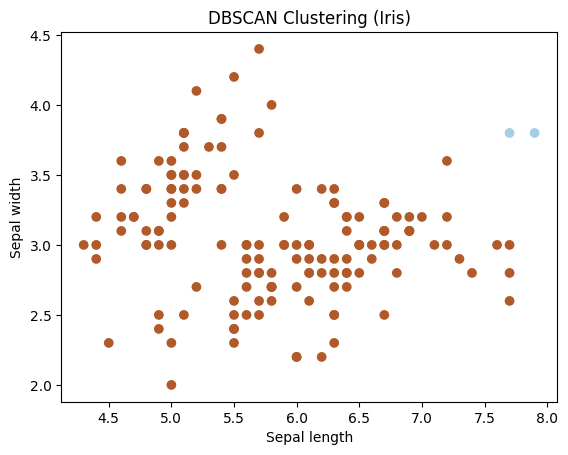

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data[:, :2]  # Using first two features for easy plotting

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Paired')
plt.title("DBSCAN Clustering (Iris)")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.show()


OPTICS (Ordering Points To Identify the Clustering Structure)

Concept: Similar to DBSCAN but builds a reachability plot to detect clusters of varying density.


Pros: More flexible than DBSCAN.


Cons: Slower, harder to interpret.


Best for: Complex, nested, or variable-density clusters.


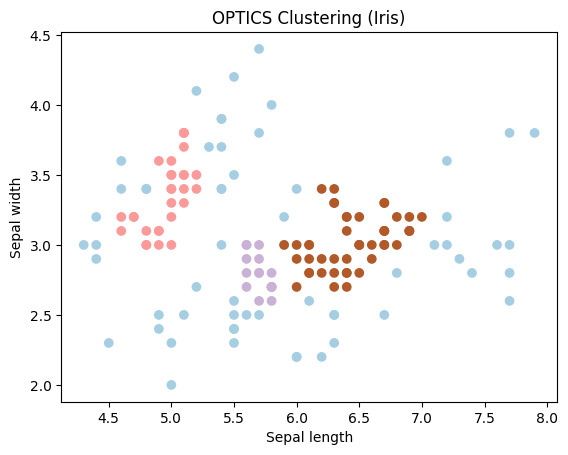

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data[:, :2]

optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.1)
labels = optics.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Paired')
plt.title("OPTICS Clustering (Iris)")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.show()


BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies)

Good for large datasets.

Incrementally builds a clustering feature tree (CF tree).

Useful when data cannot be stored in memory all at once.

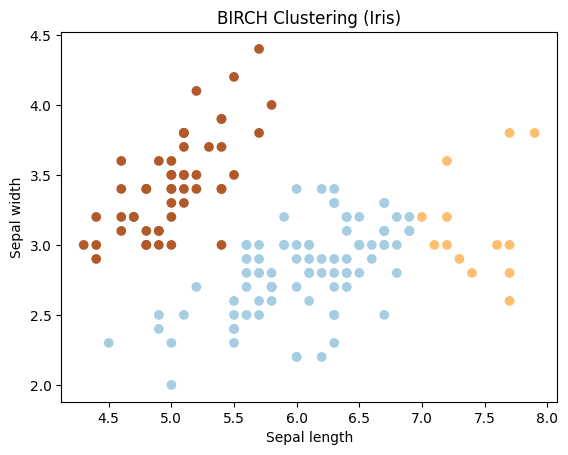

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import Birch
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data[:, :2]

birch = Birch(n_clusters=3)
labels = birch.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Paired')
plt.title("BIRCH Clustering (Iris)")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.show()
